<div align="center">
 <img src="https://raw.githubusercontent.com/matheusmota/dataviz2018/master/resources/images/logo_facens_pos.png" width="150px">
 <h1> Dataviz - Data Science Specialization Program - FACENS</h1>
</div>
<br><br>
# Aula1 | Exercício 2 
(valendo nota)

* **Data de entrega:** 01/06/2019 
* **Professor:**  Matheus Mota
* **Aluno:** Felipe Crispim da Rocha Salvagnini
* **RA:** 132312

## Questão 1
**Enunciado:**  Este notebook está associado ao *Kaggle Dataset* chamado "Aula1 | Exercício 2". Este *Kaggle Dataset* possui dois arquivos em formato CSV (anv.csv e BR_eleitorado_2016_municipio ). Escolha um dos datasets disponíveis e já conhecidos, a seu critério. Uma vez definido o csv, escolha no mínimo 7 e no máximo 12 variáveis (colunas) que você avalia como sendo relevantes. Para cada uma das suas variáveis escolhidas, forneça:


### Questão 1 - Item A - Classificação das variáveis

Classifique todas as variáveis escolhidas, e construa um dataframe com sua resposta.
Exemplo:

## Escolha do data set eleitorado 2016

In [156]:
import pandas as pd

In [157]:
df = pd.read_csv('../input/BR_eleitorado_2016_municipio.csv', delimiter=',')
df.head(1)

,cod_municipio_tse,uf,nome_municipio,total_eleitores,f_16,f_17,f_18_20,f_21_24,f_25_34,f_35_44,f_45_59,f_60_69,f_70_79,f_sup_79,gen_feminino,gen_masculino,gen_nao_informado
0,16691,RN,ESPÍRITO SANTO,6435,120,155,492,627,1482,1233,1363,579,322,62,3353,3082,0


In [158]:
resposta = [['uf', 'qualitativa nominal'], ['f_16', 'quantitativa discreta'], ['f_17', 'quantitativa discreta'], 
            ['f_21_24', 'quantitativa discreta'], ['f_25_34', 'quantitativa discreta'], ['f_70_79', 'quantitativa discreta'], ['f_sup_79', 'quantitativa discreta'], ['gen_feminino', 'quantitativa discreta'], ['gen_masculino', 'quantitativa discreta']]

resposta = pd.DataFrame(resposta, columns = ['Variavel', 'Classificação'])

display(resposta)

,Variavel,Classificação
0,uf,qualitativa nominal
1,f_16,quantitativa discreta
2,f_17,quantitativa discreta
3,f_21_24,quantitativa discreta
4,f_25_34,quantitativa discreta
5,f_70_79,quantitativa discreta
6,f_sup_79,quantitativa discreta
7,gen_feminino,quantitativa discreta
8,gen_masculino,quantitativa discreta


### Questão 1 - Item B - Tabela de frequência

Construa uma tabela de frequência para cada uma das **variáveis qualitativas** que você escolheu (caso não tenha escolhido nenhuma, deixe esta questão em branco). Uma dica: a função *value_counts()* do Pandas pode ser muito útil. =)


### Exibe a frequência das variaveís na coluna de UF's, portanto verifica a quantidade de municipios, por unidade da federação Brasileira

In [159]:
display(df['uf'].value_counts())

MG    853
SP    645
RS    497
BA    417
PR    399
SC    295
GO    246
PI    224
PB    223
MA    217
PE    184
CE    184
RN    167
PA    144
MT    141
TO    139
AL    102
RJ     92
MS     79
ES     78
SE     75
AM     62
RO     52
AC     22
AP     16
RR     15
Name: uf, dtype: int64

### Questão 1 - Item C - Representação Gráfica
Para cada uma das variáveis, produza um ou mais gráficos, usando matplotlib, que descreva seu comportamento / caracteristica. Lembre-se que estes gráficos precisam ser compatíveis com a classificação da variável. 

### Plota a quantidade de pessoas que votaram, de acordo com a faixa etária

In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
# Exibe em ordem decrescente

ages = np.array(['f_16', 'f_17', 'f_21_24', 'f_25_34', 'f_70_79', 'f_sup_79'])

total_by_age = np.array([df[i].sum() for i in ages])

new_index = np.argsort(total_by_age)[::-1]
total_by_age = total_by_age[new_index]
label_ages = np.array(['16', '17', '21 - 24', '25 - 34', '70 - 79', '> 79'])
label_ages = label_ages[new_index]

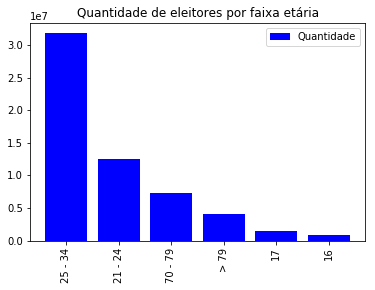

In [162]:
plt.bar(label_ages, total_by_age,   label = 'Quantidade', color = 'b')
plt.title('Quantidade de eleitores por faixa etária')
plt.xticks(rotation='vertical')

plt.legend()

plt.show()

**Obs.:** É possível observar que o maior número de eleitores está na faixa etária dos 25 as 34 anos

### Plota a quantidade de pessoas que votaram de acordo com a unidade da federação

In [163]:
total_by_uf = df.groupby(['uf']).sum()['total_eleitores']
ufs = df.groupby(['uf']).sum().index

new_index_uf = np.argsort(total_by_uf)[::-1]
total_by_uf = total_by_uf[new_index_uf]
ufs = ufs[new_index_uf]

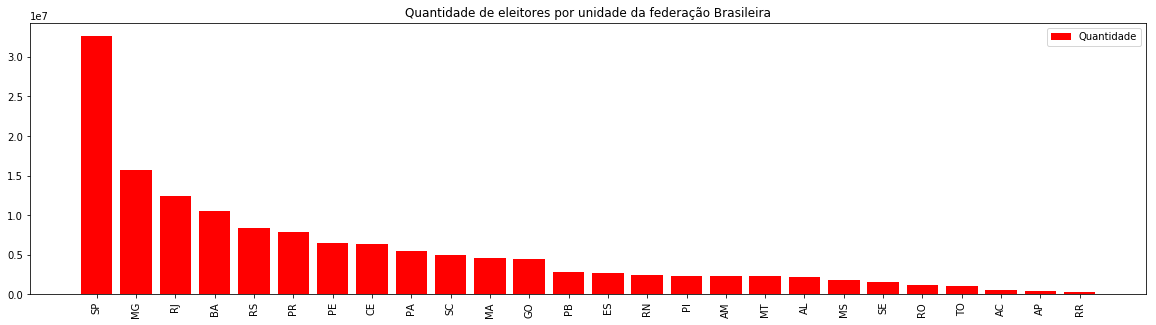

In [164]:
plt.figure(figsize=(20,5))

plt.bar(ufs, total_by_uf,   label = 'Quantidade', color = 'r')
plt.title('Quantidade de eleitores por unidade da federação Brasileira')
plt.xticks(rotation='vertical')

plt.legend()

plt.show()

### Plota a quantidade de pessoas por genêro que votaram

In [165]:
# Gráfico de pizza da quantidade de eleitores por UF
total_man = df['gen_masculino'].sum()
total_women = df['gen_feminino'].sum()

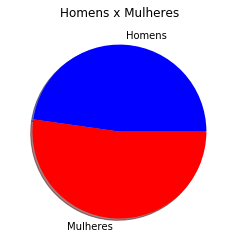

In [166]:
plt.pie(np.array([total_man, total_women]), labels = ['Homens', 'Mulheres'], colors = ['blue', 'red'], shadow = True)
plt.title('Homens x Mulheres')
plt.show()

### Plota a quantidade de pessoas por genêro que votaram por cada unidade da federação

In [167]:
grouped_uf = df.groupby(['uf']).sum()
display(grouped_uf)

,cod_municipio_tse,total_eleitores,f_16,f_17,f_18_20,f_21_24,f_25_34,f_35_44,f_45_59,f_60_69,f_70_79,f_sup_79,gen_feminino,gen_masculino,gen_nao_informado
uf,,,,,,,,,,,,,,,
AC,26946,532452,5740,9307,43905,59040,133702,111656,102769,38170,18629,9501,271850,260598,4
AL,2848710,2146520,24541,37850,160300,223120,508105,441748,467214,186182,79332,17994,1142487,1004033,0
AM,1017186,2320326,21875,42740,186857,258869,590308,497442,463263,162727,64014,32142,1185868,1134335,123
AP,97297,487446,6026,9374,42729,57596,130492,105199,92910,28795,11571,2748,248416,239029,1
BA,15136040,10570085,83218,126053,598441,949045,2451280,2177237,2349840,962696,544465,327309,5509991,5053946,6148
CE,2894041,6324780,61061,97650,433080,618882,1461066,1223136,1374543,566414,307205,181433,3328331,2991782,4667
ES,4414454,2716371,10109,20946,145649,225754,611893,561270,674214,278809,124148,63498,1412860,1301956,1555
GO,23140675,4464442,25937,48545,266715,396615,1006426,953095,1077954,414761,196980,77349,2325613,2138616,213
MA,1770685,4611247,74130,96856,351639,459925,1133078,882784,909479,380250,206524,116392,2375505,2234603,1139


In [168]:
labels_gen = []

for i in ufs:
    labels_gen.append(i + '_MASCULINO')
    labels_gen.append(i + '_FEMININO')
    
labels_gen = np.array(labels_gen)
masculino_uf = grouped_uf['gen_masculino'][new_index_uf]
feminino_uf = grouped_uf['gen_feminino'][new_index_uf]

<BarContainer object of 26 artists>

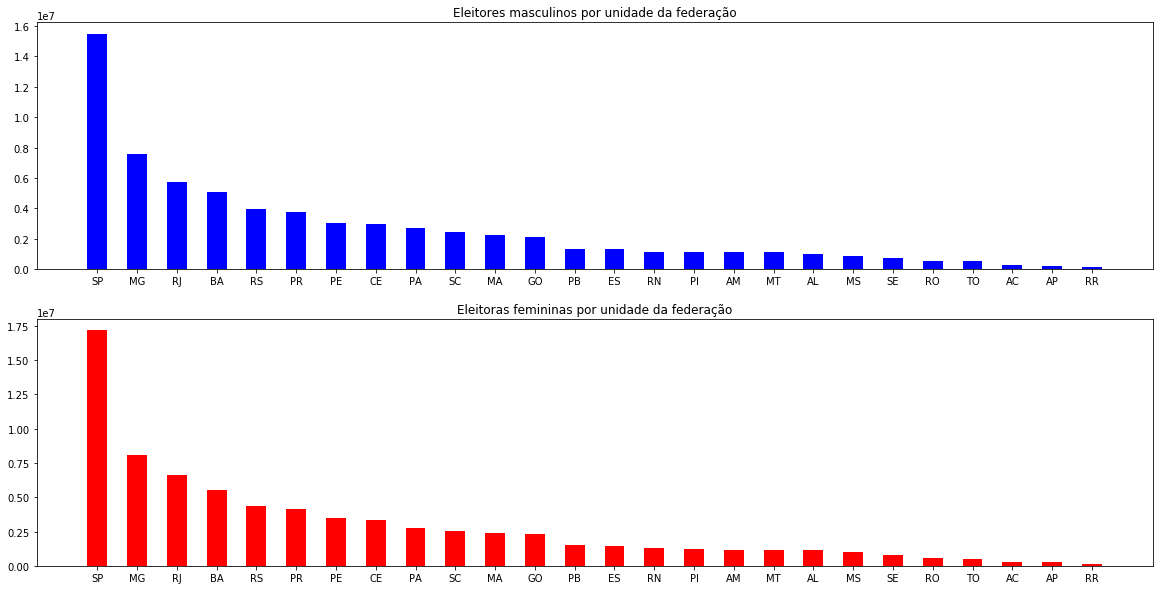

In [173]:
gridsize = (2, 1) # 4 rows, 2 columns
fig = plt.figure(figsize=(20, 10)) # this creates a figure without axes
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid(gridsize, (1, 0), colspan=1, rowspan=2)

ax1.set_title('Eleitores masculinos por unidade da federação')
ax1.bar(ufs, masculino_uf, width=0.5, label = 'Masculino', color = 'b')
ax2.set_title('Eleitoras femininas por unidade da federação')
ax2.bar(ufs, feminino_uf,  width=0.5, label = 'Feminino', color = 'r')

# Dicas

- Exemplo de acesso aos CSVs disponíveis no dataset
> df = pd.read_csv('../input/anv.csv', delimiter=',')